In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregando o dataset Boston Housing do TensorFlow
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Verificando os dados
print(f'Tamanho do conjunto de treino: {X_train.shape}')
print(f'Tamanho do conjunto de teste: {X_test.shape}')


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
Tamanho do conjunto de treino: (404, 13)
Tamanho do conjunto de teste: (102, 13)


In [4]:
# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Definindo a estrutura do modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\Yuri\Documents\Estudos\python\ML data\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Treinando o modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, validation_split=0.2)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 541.5762 - val_loss: 577.7493
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 496.5749 - val_loss: 408.0181
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 293.8166 - val_loss: 150.6942
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 102.2858 - val_loss: 71.5671
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.8933 - val_loss: 45.3923
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.7564 - val_loss: 34.7765
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.0879 - val_loss: 29.2783
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.6440 - val_loss: 24.9101
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.6453 - val_loss: 23.0641
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.4612 - val_loss: 21.6730
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.8902 - val_loss: 19.8821
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━

In [8]:
# Avaliando o modelo
loss = model.evaluate(X_test_scaled, y_test)
print(f'Erro Quadrático Médio (MSE) no conjunto de teste: {loss}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.9474 
Erro Quadrático Médio (MSE) no conjunto de teste: 19.29828453063965


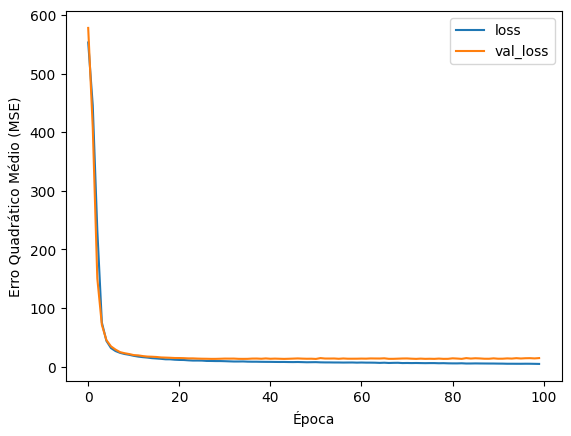

In [9]:
# Plotando o histórico de treinamento
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Época')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


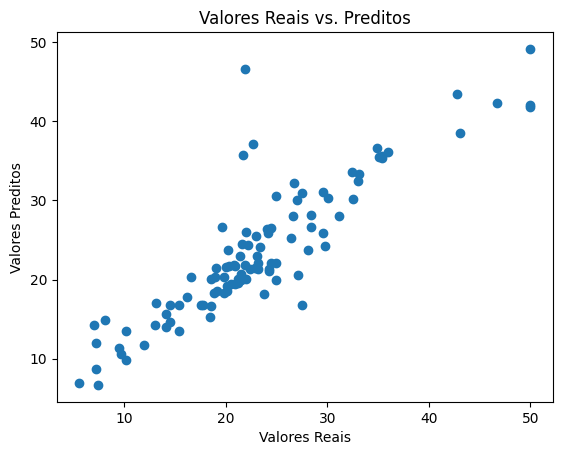

Erro Quadrático Médio (MSE) calculado manualmente: 19.29828395175781


In [10]:
# Fazendo previsões
y_pred = model.predict(X_test_scaled)

# Plotando os valores reais vs. preditos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Preditos')
plt.show()

# Calculando o MSE manualmente
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE) calculado manualmente: {mse}')
